# pip install pandas
# pip install geopy
# pip install pyephem
# pip install matplotlib

In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
import enphase as e
import matplotlib.pyplot as pyplot
import numpy as np
import pprint

In [2]:
#e.print_environ()
pp = pprint.PrettyPrinter(indent=4)
a_few_days_ago = e.today() - timedelta(days=3)
not_long_ago = e.today() - timedelta(days=30)

In [3]:
e.save_to_files(complete_days=False, start_date=a_few_days_ago)

/Users/electronhead/dev/data/enphase/stats_2022-03-23.csv
SUCCESS: 145 rows written to  /Users/electronhead/dev/data/enphase/stats_2022-03-23.csv
/Users/electronhead/dev/data/enphase/stats_2022-03-24.csv
SUCCESS: 149 rows written to  /Users/electronhead/dev/data/enphase/stats_2022-03-24.csv
/Users/electronhead/dev/data/enphase/stats_2022-03-25.csv
SUCCESS: 149 rows written to  /Users/electronhead/dev/data/enphase/stats_2022-03-25.csv
/Users/electronhead/dev/data/enphase/stats_2022-03-26.csv
SUCCESS: 0 rows written to  /Users/electronhead/dev/data/enphase/stats_2022-03-26.csv


{'dates_processed': 4, 'last_date_processed': datetime.date(2022, 3, 26)}

In [4]:
data = e.compute_data_frame()
e.augment_data_frame(data)
data_copy = data.copy()
# data15 = e.compute_data_frame(increment=15)
# data30 = e.compute_data_frame(increment=30)
data60 = e.compute_data_frame(increment=60)

In [5]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago, e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 10: # SUM RECENT WATT HOURS minus ONE YEAR
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago-timedelta(days=365), e.today()-timedelta(days=365))
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        date1 = date(2022,2,25)
        date2 = date(2022,3,25)
        glee = e.by_date(data, date1, date2)[e.wh].sum()
        print(f"{glee/1000} kWh for prior PGE billing period ({date1} to {date2})\n")
    elif flea == 11: # 31_day rolling aggregation -- sum, min, mean, max
        wh = e.by_date(data[[e.d,e.wh]], e.pge_online_date(), e.today())
        grouped = wh.groupby([e.d]).sum()
        rolling = grouped.rolling(31).agg([np.sum])
        print_glee(rolling)
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.min])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.mean])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.max])
        rolling.plot(figsize=(15,8),grid=True)
        #print_glee(rolling)
        

+++++++++++++++++
flea: 9
+++++++++++++++++
434.773 kWh for prior PGE billing period (2022-02-25 to 2022-03-25)

+++++++++++++++++
flea: 4
+++++++++++++++++
            watt_hours
date                  
2022-02-24       13448
2022-02-25       22138
2022-02-26        8489
2022-02-27        4045
2022-02-28        4690
2022-03-01        5389
2022-03-02        5632
2022-03-03       13107
2022-03-04       14506
2022-03-05       20481
2022-03-06       13722
2022-03-07       23369
2022-03-08        4673
2022-03-09       25626
2022-03-10       21450
2022-03-11       21815
2022-03-12       16466
2022-03-13        8851
2022-03-14        6689
2022-03-15       20905
2022-03-16       21723
2022-03-17        7785
2022-03-18       11464
2022-03-19       22358
2022-03-20       12929
2022-03-21        5461
2022-03-22       24303
2022-03-23       10013
2022-03-24       29420
2022-03-25       27274 

len         30
sum     448221
amin      4045
mean     14940
amax     29420
Name: watt_hours, dtype: int64

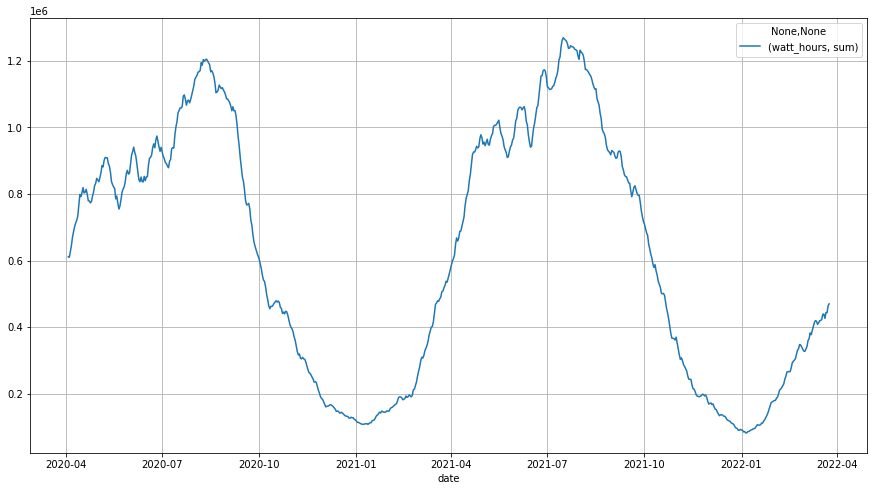

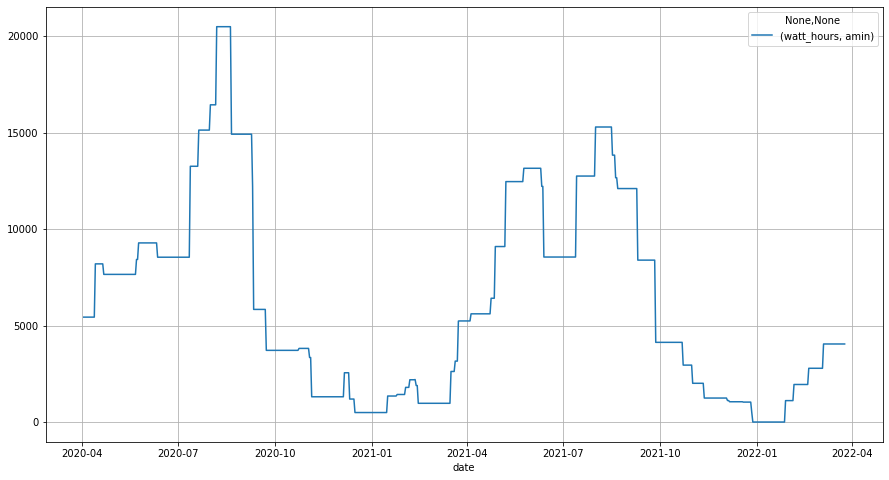

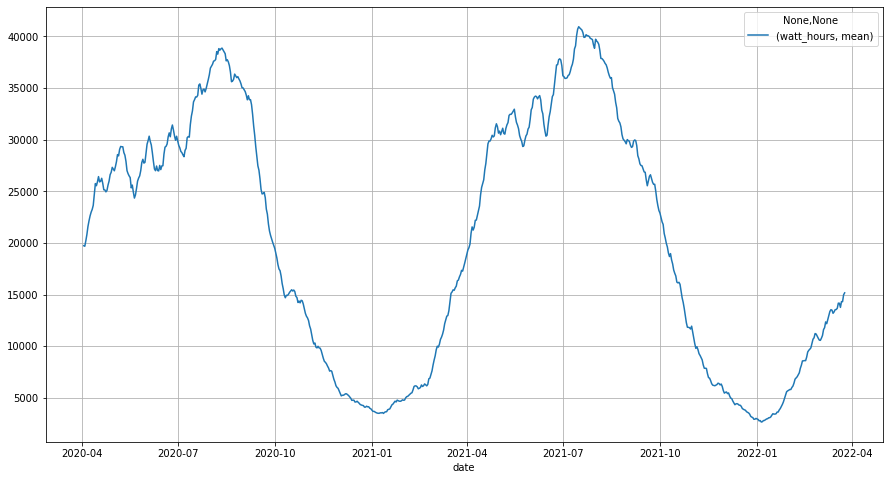

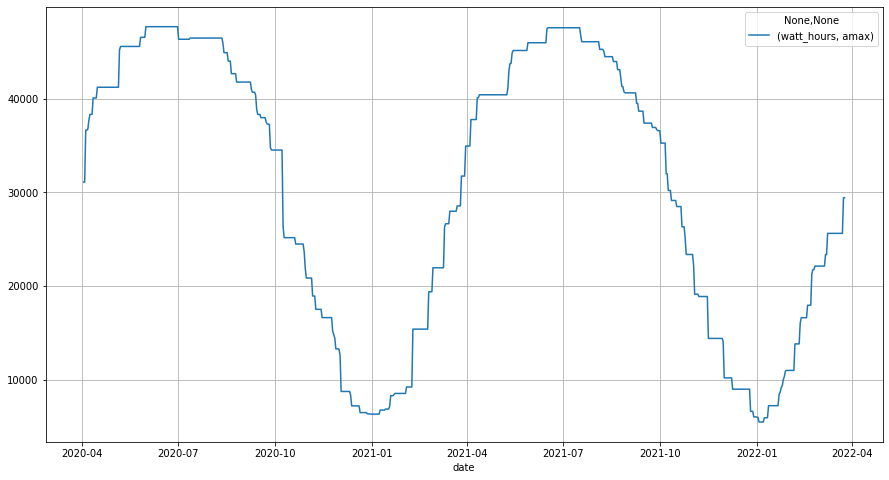

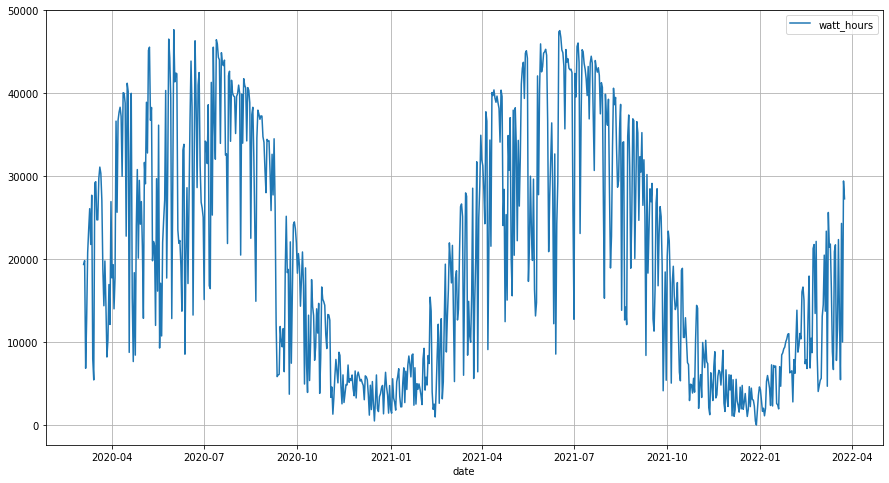

In [6]:
for flea in [9, 4, 10, 11, 0, 1, 3]:
    print('+++++++++++++++++')
    print('flea:', flea)                
    print('+++++++++++++++++')
    slap(flea)

<AxesSubplot:xlabel='time'>

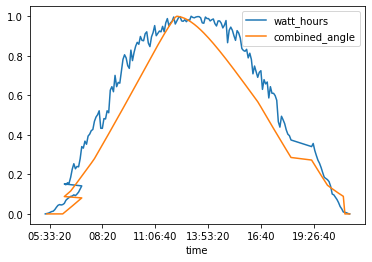

In [7]:
col = e.combined
angle_date = date(2021,6,21)
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

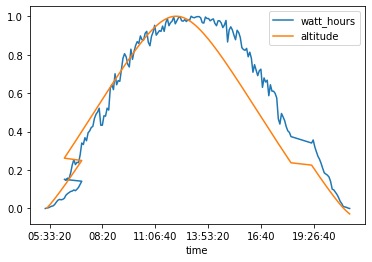

In [8]:
col = e.alt
angle_date = date(2021,6,21)
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

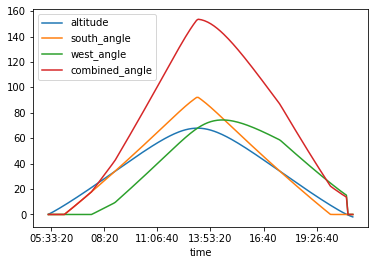

In [9]:
angle_date = date(2021,6,21)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [10]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, date(2020,6,21), date(2020,6,21)).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

                watt_hours
time                      
05:20:00-07:00           0
05:25:00-07:00           1
05:30:00-07:00           2
05:35:00-07:00           4
05:40:00-07:00           6
...                    ...
21:00:00-07:00           5
21:05:00-07:00           4
21:10:00-07:00           3
21:15:00-07:00           1
21:20:00-07:00           0

[193 rows x 1 columns]
                combined_angle
time                          
05:45:00-07:00        0.000000
05:50:00-07:00        0.000000
05:55:00-07:00        0.000000
06:00:00-07:00        0.000000
06:05:00-07:00        0.000000
...                        ...
20:55:00-07:00       14.461792
21:00:00-07:00       13.685152
21:05:00-07:00        0.000000
21:10:00-07:00        0.000000
21:15:00-07:00        0.000000

[187 rows x 1 columns]
                watt_hours  combined_angle
time                                      
05:20:00-07:00           0             NaN
05:25:00-07:00           1             NaN
05:30:00-07:00           2

In [11]:
angle_date = date(2020,6,21)
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

combined_angle    14150.144345
dtype: float64


In [12]:
data.groupby(e.t)[e.wh].max().sum()

56056

In [13]:
data

,date,time,date_time,watts,watt_hours,forward,backward,peak,altitude,azimuth,south_angle,west_angle,combined_angle
0,2020-03-04,06:20:00-08:00,2020-03-04 06:20:00-08:00,1,0,0,19355,0,-15.262590,83.113314,0.000000,0.000000,0.000000
1,2020-03-04,06:25:00-08:00,2020-03-04 06:25:00-08:00,1,0,0,19355,0,-14.391202,84.030328,0.000000,0.000000,0.000000
2,2020-03-04,06:30:00-08:00,2020-03-04 06:30:00-08:00,1,0,0,19355,0,-13.518358,84.942302,0.000000,0.000000,0.000000
3,2020-03-04,06:35:00-08:00,2020-03-04 06:35:00-08:00,1,0,0,19355,0,-12.644290,85.849693,0.000000,0.000000,0.000000
4,2020-03-04,06:40:00-08:00,2020-03-04 06:40:00-08:00,1,0,0,19355,0,-11.769221,86.752978,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109792,2022-03-25,19:10:00-07:00,2022-03-25 19:10:00-07:00,105,9,27261,22,0,2.901655,270.347630,2.806543,27.430861,27.494317
109793,2022-03-25,19:15:00-07:00,2022-03-25 19:15:00-07:00,81,7,27268,13,0,2.078568,271.240172,1.739252,26.363571,25.466466
109794,2022-03-25,19:20:00-07:00,2022-03-25 19:20:00-07:00,52,4,27272,6,0,1.276109,272.132604,0.692621,25.316939,23.477867
109795,2022-03-25,19:25:00-07:00,2022-03-25 19:25:00-07:00,20,2,27274,2,0,0.504224,273.025310,0.000000,24.300807,21.870726
